<a href="https://colab.research.google.com/github/ksb25395/CAP6779/blob/master/Semeval_Embedding_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
# from gensim.models import KeyedVectors
# EMBEDDING_FILE = '/content/gdrive/My Drive/Colab Notebooks/datasets/Google/GoogleNews-vectors-negative300.bin.gz'
# word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

!unzip "/content/gdrive/My Drive/Colab Notebooks/datasets/glove.twitter.27B.200d.txt.zip" 
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = datapath('/content/glove.twitter.27B.200d.txt')
tmp_file = get_tmpfile("test_word2vec.txt")
_ = glove2word2vec(glove_file, tmp_file)
word2vec = KeyedVectors.load_word2vec_format(tmp_file)

Archive:  /content/gdrive/My Drive/Colab Notebooks/datasets/glove.twitter.27B.200d.txt.zip
  inflating: glove.twitter.27B.200d.txt  


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
import pandas as pd 
df=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/datasets/Semeval-2017-4A-English/SemEval2017-task4-dev.subtask-A.english.INPUT.txt', sep="\t", header=None)

In [0]:
df.head()
df = df.drop(columns=3)

In [0]:
df.columns = ['id', 'sentiment', 'text']

In [6]:
df

,id,sentiment,text
0,619950566786113536,neutral,"Picturehouse's, Pink Floyd's, 'Roger Waters: T..."
1,619969366986235905,neutral,Order Go Set a Watchman in store or through ou...
2,619971047195045888,negative,If these runway renovations at the airport pre...
3,619974445185302528,neutral,If you could ask an onstage interview question...
4,619987808317407232,positive,A portion of book sales from our Harper Lee/Go...
...,...,...,...
20627,681877834982232064,neutral,@ShaquilleHoNeal from what I think you're aski...
20628,681879579129200640,positive,"Iran ranks 1st in liver surgeries, Allah bless..."
20629,681883903259357184,neutral,Hours before he arrived in Saudi Arabia on Tue...
20630,681904976860327936,negative,@VanityFair Alex Kim Kardashian worth how to ...


In [0]:
df.to_csv('/content/gdrive/My Drive/Colab Notebooks/datasets/Semeval-2017-4A-English/SemEval2017-task4-dev.subtask-A.english.INPUT.csv', sep="\t", header=None)

In [0]:
import numpy as np
import re
import nltk
import spacy
import string

In [9]:
# Lower casing
df["text"] = df["text"].str.lower()
df.head()

,id,sentiment,text
0,619950566786113536,neutral,"picturehouse's, pink floyd's, 'roger waters: t..."
1,619969366986235905,neutral,order go set a watchman in store or through ou...
2,619971047195045888,negative,if these runway renovations at the airport pre...
3,619974445185302528,neutral,if you could ask an onstage interview question...
4,619987808317407232,positive,a portion of book sales from our harper lee/go...


In [0]:
# Removal of URLs
def remove_urls(text):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)
df["text"] = df["text"].apply(lambda x : remove_urls(x))
df.head()

# Remove @ mentions
def remove_mentions(text):
  text = re.sub(r"(?:\@|https?\://)\S+", "", text)
  return text
df["text"] = df["text"].apply(lambda x: remove_mentions(x))

def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text
    
df["text"] = df["text"].apply(lambda x: strip_links(x))

def strip_all_entities(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

df["text"] = df["text"].apply(lambda x: strip_all_entities(x))

In [11]:
# Conversion of emoticons to words
!pip install emot
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
def convert_emoticons(text):
  for emot in EMOTICONS:
    re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
  return text

df["text"] = df["text"].apply(lambda x : convert_emoticons(x))
df.head()

,id,sentiment,text
0,619950566786113536,neutral,picturehouse s pink floyd s roger waters the w...
1,619969366986235905,neutral,order go set a watchman in store or through ou...
2,619971047195045888,negative,if these runway renovations at the airport pre...
3,619974445185302528,neutral,if you could ask an onstage interview question...
4,619987808317407232,positive,a portion of book sales from our harper lee go...


In [12]:
# convert emoji to word
!pip install emoji
import emoji
def convert_emojis(text):
    return emoji.demojize(text)

df["text"] = df["text"].apply(lambda x : convert_emojis(x))
df.head()

     |████████████████████████████████| 51kB 1.7MB/s 
  Created wheel for emoji: filename=emoji-0.5.4-cp36-none-any.whl size=42176 sha256=9e9f2df072c78b0ac26f41529514f74c8c8f8e904db4c3ed27507f4451a1948a
  Stored in directory: /root/.cache/pip/wheels/2a/a9/0a/4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji


,id,sentiment,text
0,619950566786113536,neutral,picturehouse s pink floyd s roger waters the w...
1,619969366986235905,neutral,order go set a watchman in store or through ou...
2,619971047195045888,negative,if these runway renovations at the airport pre...
3,619974445185302528,neutral,if you could ask an onstage interview question...
4,619987808317407232,positive,a portion of book sales from our harper lee go...


In [0]:
# !pip install autocorrect
# from autocorrect import Speller
# spell = Speller(lang='en')
# def correct_spellings(text):
#   return spell(text)

# df["text"] = df["text"].apply(lambda x: correct_spellings(x))
# df.head()

In [14]:
# expand contractions
!pip install -q contractions
import contractions
def expand_contractions(text):
  return contractions.fix(text)

df["text"] = df["text"].apply(lambda x : expand_contractions(x))
df.head()

     |████████████████████████████████| 245kB 4.1MB/s 
     |████████████████████████████████| 317kB 31.3MB/s 


,id,sentiment,text
0,619950566786113536,neutral,picturehouse s pink floyd s roger waters the w...
1,619969366986235905,neutral,order go set a watchman in store or through ou...
2,619971047195045888,negative,if these runway renovations at the airport pre...
3,619974445185302528,neutral,if you could ask an onstage interview question...
4,619987808317407232,positive,a portion of book sales from our harper lee go...


In [15]:
PUNCT = string.punctuation
def remove_punctuation(text):
  return text.translate(str.maketrans('', '', PUNCT))

df["text"] = df["text"].apply(lambda x : remove_punctuation(x))
df.head()

,id,sentiment,text
0,619950566786113536,neutral,picturehouse s pink floyd s roger waters the w...
1,619969366986235905,neutral,order go set a watchman in store or through ou...
2,619971047195045888,negative,if these runway renovations at the airport pre...
3,619974445185302528,neutral,if you could ask an onstage interview question...
4,619987808317407232,positive,a portion of book sales from our harper lee go...


In [16]:
from nltk.corpus import stopwords
nltk.download('stopwords')
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [17]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["text"] = df["text"].apply(lambda x : remove_stopwords(x))
df.head()

,id,sentiment,text
0,619950566786113536,neutral,picturehouse pink floyd roger waters walll ope...
1,619969366986235905,neutral,order go set watchman store website tuesday ge...
2,619971047195045888,negative,runway renovations airport prevent seeing tayl...
3,619974445185302528,neutral,could ask onstage interview question miss usa ...
4,619987808317407232,positive,portion book sales harper lee go set watchman ...


In [18]:
from collections import Counter
cnt = Counter()
for text in df["text"].values:
  for word in text.split():
    cnt[word] += 1
cnt.most_common(10)

[('may', 3604),
 ('tomorrow', 2953),
 ('day', 1661),
 ('going', 1525),
 ('friday', 1312),
 ('see', 1303),
 ('amp', 1297),
 ('sunday', 1263),
 ('night', 1255),
 ('1st', 1245)]

In [19]:
FREQ_WORDS = set([word for (word, count) in cnt.most_common(10)])
def remove_freqwords(text):
  return " ".join([word for word in str(text).split() if word not in FREQ_WORDS])

df["text"] = df["text"].apply(lambda x : remove_freqwords(x))
df.head()

,id,sentiment,text
0,619950566786113536,neutral,picturehouse pink floyd roger waters walll ope...
1,619969366986235905,neutral,order go set watchman store website tuesday ge...
2,619971047195045888,negative,runway renovations airport prevent seeing tayl...
3,619974445185302528,neutral,could ask onstage interview question miss usa ...
4,619987808317407232,positive,portion book sales harper lee go set watchman ...


In [20]:
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df["text"] = df["text"].apply(lambda text: remove_rarewords(text))
df.head()

,id,sentiment,text
0,619950566786113536,neutral,picturehouse pink floyd roger waters walll ope...
1,619969366986235905,neutral,order go set watchman store website tuesday ge...
2,619971047195045888,negative,runway renovations airport prevent seeing tayl...
3,619974445185302528,neutral,could ask onstage interview question miss usa ...
4,619987808317407232,positive,portion book sales harper lee go set watchman ...


In [21]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df["text"] = df["text"].apply(lambda text: lemmatize_words(text))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,id,sentiment,text
0,619950566786113536,neutral,picturehouse pink floyd roger water walll open...
1,619969366986235905,neutral,order go set watchman store website tuesday ge...
2,619971047195045888,negative,runway renovation airport prevent see taylor s...
3,619974445185302528,neutral,could ask onstage interview question miss usa ...
4,619987808317407232,positive,portion book sale harper lee go set watchman r...


In [0]:
# SMS Spelling Expansion

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(df, df["sentiment"]):
    train_set = df.loc[train_idx]
    test_set = df.loc[test_idx]

print(train_set["sentiment"].value_counts())
print(test_set["sentiment"].value_counts())

neutral     8273
positive    5647
negative    2585
Name: sentiment, dtype: int64
neutral     2069
positive    1412
negative     646
Name: sentiment, dtype: int64


In [24]:
train_set["sentiment"] = train_set["sentiment"].astype('category')
train_set["sentiment"] = train_set["sentiment"].cat.codes
train_set = train_set[["text", "sentiment"]]
test_set["sentiment"] = test_set["sentiment"].astype('category')
test_set["sentiment"] = test_set["sentiment"].cat.codes
test_set = test_set[["text", "sentiment"]]
print(train_set)
print(test_set)

                                                    text  sentiment
11706                still confuse kanye west speech lol          0
6270   talk naruto mom become huge fan within past ye...          2
14225  bryant huge homer tie cub rookie mark kris bry...          1
80     thank miss usa stole word beauty inside outsid...          1
12537  ott take annual leave immerse within first jan...          2
...                                                  ...        ...
8386   fan boy scout john cena character work real te...          2
19076  star war o2 centre join u 10am storytelling pr...          1
17034  um sir concede daughter rise star rahul gandhi...          1
17556         black kendrick lamar might best ever heard          2
17401  rahul gandhi aka raul vinci need bag check mat...          0

[16505 rows x 2 columns]
                                                    text  sentiment
3524   apart 4th inning mastery david price best part...          2
9205   dragon quest he

In [25]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
df_texts = df["text"]
train_texts = train_set["text"]
test_texts = test_set["text"]

In [27]:
NUM_WORDS=25000
tokenizer = Tokenizer(num_words=NUM_WORDS,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\'',
                      lower=True)
tokenizer.fit_on_texts(df_texts)
sequences_train = tokenizer.texts_to_sequences(train_texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 18610 unique tokens.


In [0]:
X_train = pad_sequences(sequences_train)
y_train = to_categorical(list(train_set["sentiment"]))

In [0]:
import numpy as np
EMBED_DIM = 200
vocab_size = min(NUM_WORDS, len(word_index) + 1)
embedding_matrix =np.random.normal(0,np.sqrt(0.25),[vocab_size, EMBED_DIM])

In [0]:
count = []
for word, i in word_index.items():
    if i >= vocab_size:
        continue
    try:
        embedding_vec = word2vec[word]
        embedding_matrix[i] = embedding_vec
    except KeyError:
        count.append(word)
        embedding_matrix[i] = np.random.normal(0,np.sqrt(0.25),EMBED_DIM)

In [31]:
count
len(count)

2520

In [32]:
from keras.layers import Embedding
embedding_layer = Embedding(vocab_size,
                            EMBED_DIM,
                            weights=[embedding_matrix],
                            trainable=True)
seq_len = X_train.shape[1]
from keras.layers import Input
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Model
from keras.layers import LSTM
from keras.layers import Dropout
inputs = Input(shape=(seq_len,))
embeddings = embedding_layer(inputs)
# flattened = Flatten()(embeddings)
lstm = LSTM(200, dropout=0.25)(embeddings)
dense0 = Dense(128, activation="relu")(lstm)
dropout0 = Dropout(rate=0.25)(dense0)
dense1 = Dense(64, activation="relu")(dropout0)
dropout1 = Dropout(rate=0.25)(dense1)
dense2 = Dense(32, activation="relu")(dropout1)
dropout2 = Dropout(rate=0.25)(dense2)
dense3 = Dense(16, activation="relu")(dropout2)
output = Dense(y_train.shape[1], activation='softmax')(dense3)
model = Model(inputs, output)











Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [33]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 29)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 29, 200)           3722200   
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               25728     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0   

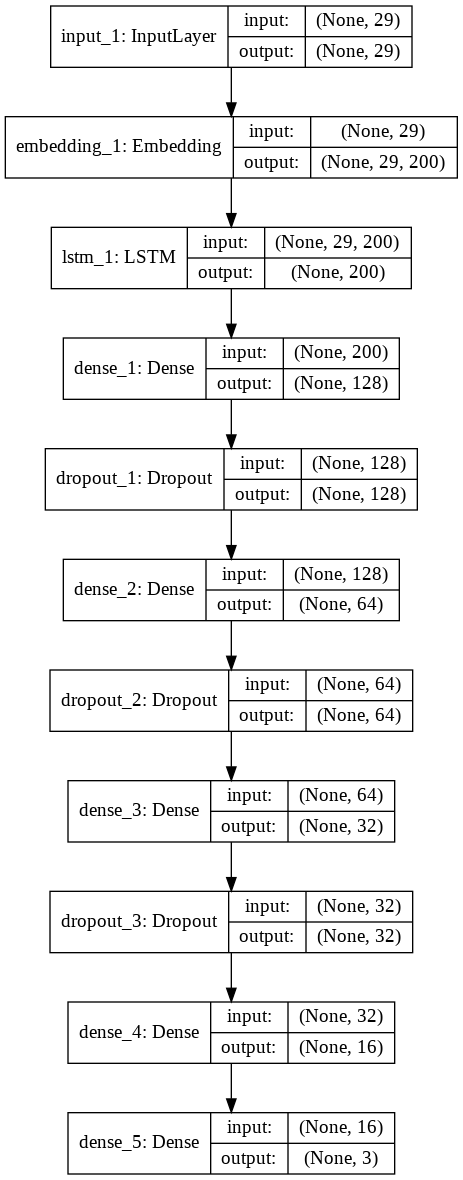

In [34]:
from keras.utils import plot_model
plot_model(model, to_file='model_1.png', show_shapes=True)

In [35]:
from keras.optimizers import Adam
!pip install keras-rectified-adam
from keras_radam import RAdam
opt = RAdam()

from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['acc', recall_m, precision_m, f1_m])

  Created wheel for keras-rectified-adam: filename=keras_rectified_adam-0.17.0-cp36-none-any.whl size=14781 sha256=0f1145fc9fbedefa5cdae2579a2b388d88365ea064409886de98b8ba993d2a22
  Stored in directory: /root/.cache/pip/wheels/7b/01/27/3a934e1a5644f5b93c720422a6ef97034ea78a21ba71cfb549
Successfully built keras-rectified-adam




In [36]:
model.fit(X_train, y_train, batch_size=500, epochs=20, verbose=1, validation_split=0.2, shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 13204 samples, validate on 3301 samples
Epoch 1/20
13204/13204 [==============================] - 26s 2ms/step - loss: 1.1026 - acc: 0.3513 - recall_m: 0.0000e+00 - precision_m: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 1.0725 - val_acc: 0.4602 - val_recall_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 2/20
13204/13204 [==============================] - 24s 2ms/step - loss: 1.0541 - acc: 0.4680 - recall_m: 0.0195 - precision_m: 0.2751 - f1_m: 0.0342 - val_loss: 1.0145 - val_acc: 0.4838 - val_recall_m: 0.0070 - val_precision_m: 0.4176 - val_f1_m: 0.0137
Epoch 3/20
13204/13204 [==============================] - 24s 2ms/step - loss: 1.0146 - acc: 0.4940 - recall_m: 0.2148 - precision_m: 0.5047 - f1_m: 0.2999 - val_loss: 0.9982 - val_acc: 0.4838 - val_recall_m: 0.0076 - val_precision_m: 0.6335 - val_f1_m: 0.0150
Epoch 4/20
13204/13204 [========================

In [0]:
sequences_test=tokenizer.texts_to_sequences(test_set.text)
X_test = pad_sequences(sequences_test,maxlen=X_train.shape[1])
y_test = to_categorical(list(test_set['sentiment']))

In [38]:
model.evaluate(X_test, y_test)

4127/4127 [==============================] - 3s 616us/step


[0.817373616111345,
 0.6576205476854915,
 0.6302398837794106,
 0.6748637365809589,
 0.651453629183024]

In [39]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
from sklearn.metrics import classification_report, recall_score, f1_score
print(f1_score(y_true, y_pred, average='macro'))
print(recall_score(y_true, y_pred, average='macro'))
print(classification_report(y_true, y_pred))

0.6282708331455774
0.6198734160758254
              precision    recall  f1-score   support

           0       0.59      0.49      0.54       646
           1       0.68      0.71      0.69      2069
           2       0.65      0.66      0.65      1412

    accuracy                           0.66      4127
   macro avg       0.64      0.62      0.63      4127
weighted avg       0.66      0.66      0.66      4127



Here, we have LSTM output a 300-dim embedding and we use Rectified Adam as optimizer. Without pretraining, we have the following metrics report.

```
Average Recall - 0.621831786567959

Classification report
              precision    recall  f1-score   support

           0       0.48      0.57      0.52       646
           1       0.68      0.66      0.67      2069
           2       0.66      0.64      0.65      1412

    accuracy                           0.64      4127
   macro avg       0.61      0.62      0.61      4127
weighted avg       0.64      0.64      0.64      4127
```



In [0]:
from sklearn.metrics import confusion_matrix
z = confusion_matrix(y_true, y_pred)
print(z)

[[ 265  310   71]
 [ 153 1568  348]
 [  36  522  854]]


In [0]:
y_random = np.random.randint(3, size=len(y_true))

In [0]:
f1_score(y_true, y_random, average='macro')

0.3197831738539613

Random prediction metric is 0.316. That is, if we choose either negative, neutral or positive randomly, our F-score turns out to be around 0.32